In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [15]:
dataset=pd.read_csv("Airpassengers.csv")

In [16]:
dataset

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [17]:
dataset['Month']=pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset=dataset.set_index(['Month'])

In [18]:
from datetime import datetime
indexedDataset

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


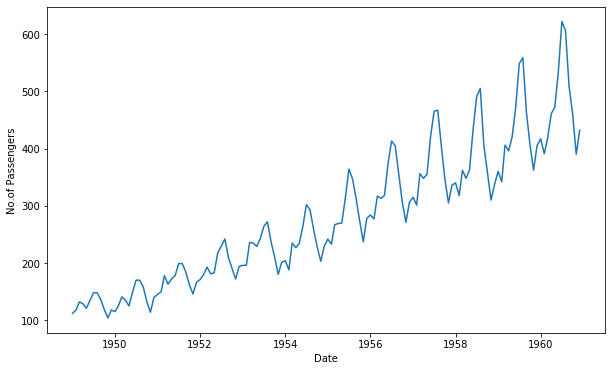

In [19]:
plt.xlabel("Date")
plt.ylabel("No.of Passengers")
plt.plot(indexedDataset)

# Rolling Statistics

In [20]:
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()

In [21]:
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

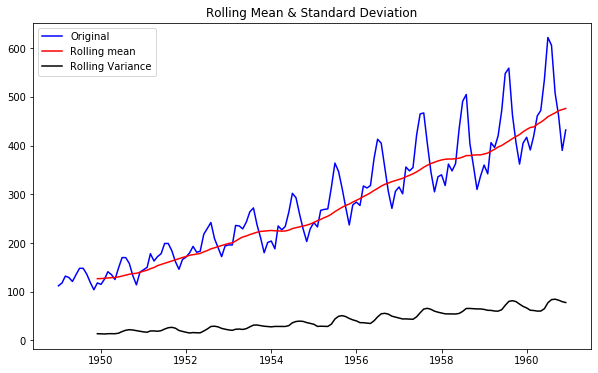

In [22]:
orig=plt.plot(indexedDataset,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling mean')
std=plt.plot(rolstd,color='black',label='Rolling Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

# Augmented Dickey Fuller Test(ADFT)

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
print("Dickey-Fuller test result")
dftest=adfuller(indexedDataset['#Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Stastistics','p-value','#Lags Used','No of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key]=value
print(dfoutput)

Dickey-Fuller test result
Test Stastistics             0.815369
p-value                      0.991880
#Lags Used                  13.000000
No of observations used    130.000000
Critical Value(1%)          -3.481682
Critical Value(5%)          -2.884042
Critical Value(10%)         -2.578770
dtype: float64


# Estimated Trend-log based

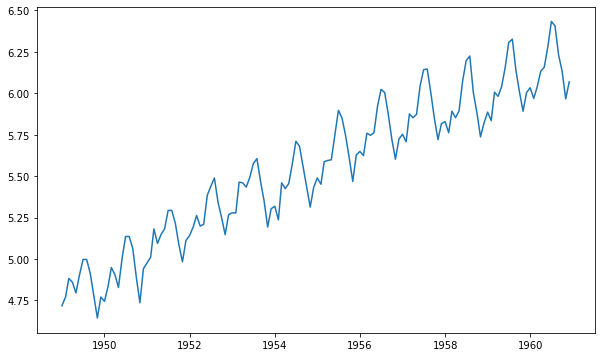

In [25]:
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

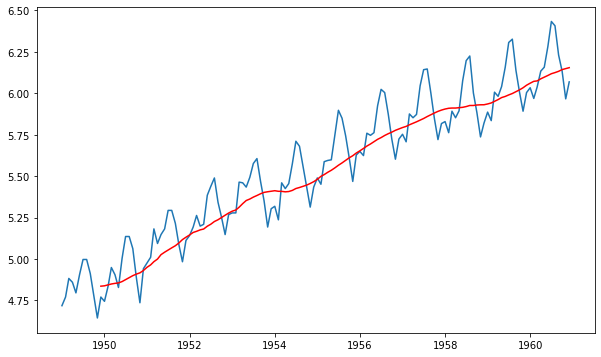

In [26]:
movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingSTD=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [27]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
#datasetLogScaleMinusMoving Average

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [28]:
def test_stationarity(timeseries):
    #Determining rolling statistics
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(movingAverage,color='red',label='Rolling mean')
    std=plt.plot(movingSTD,color='black',label='Rolling Variance')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    
    #perfroming Dickey-fuller test
    print("Dickey-Fuller test result")
    dftest=adfuller(timeseries['#Passengers'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Stastistics','p-value','#Lags Used','No of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

Dickey-Fuller test result
Test Stastistics            -3.162908
p-value                      0.022235
#Lags Used                  13.000000
No of observations used    119.000000
Critical Value (1%)         -3.486535
Critical Value (5%)         -2.886151
Critical Value (10%)        -2.579896
dtype: float64


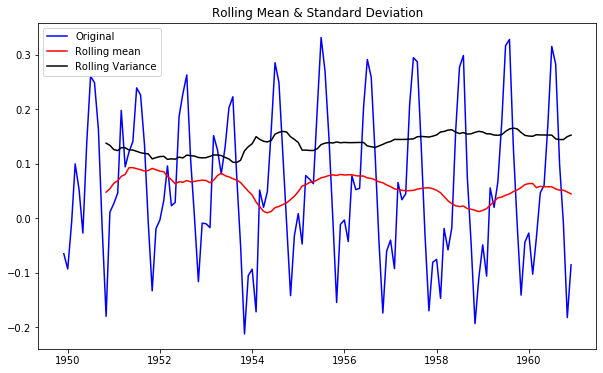

In [29]:
test_stationarity(datasetLogScaleMinusMovingAverage)

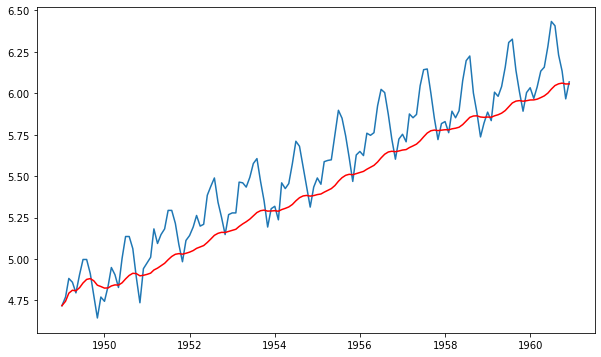

In [30]:
exponentailDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentailDecayWeightedAverage,color='red')

Dickey-Fuller test result
Test Stastistics            -3.601262
p-value                      0.005737
#Lags Used                  13.000000
No of observations used    130.000000
Critical Value (1%)         -3.481682
Critical Value (5%)         -2.884042
Critical Value (10%)        -2.578770
dtype: float64


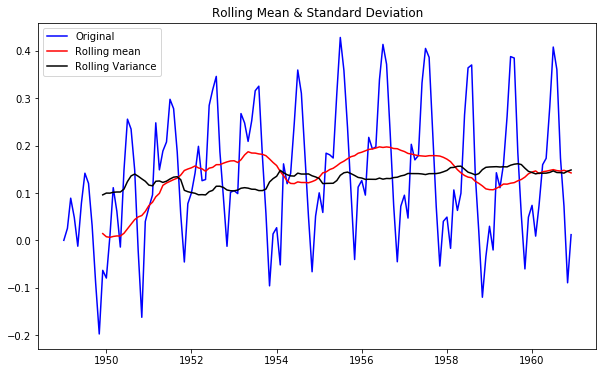

In [31]:
datasetLogScaleMinusMovingExponentailDecayAverage=indexedDataset_logScale-exponentailDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentailDecayAverage)

Dickey-Fuller test result
Test Stastistics            -2.717131
p-value                      0.071121
#Lags Used                  14.000000
No of observations used    128.000000
Critical Value (1%)         -3.482501
Critical Value (5%)         -2.884398
Critical Value (10%)        -2.578960
dtype: float64


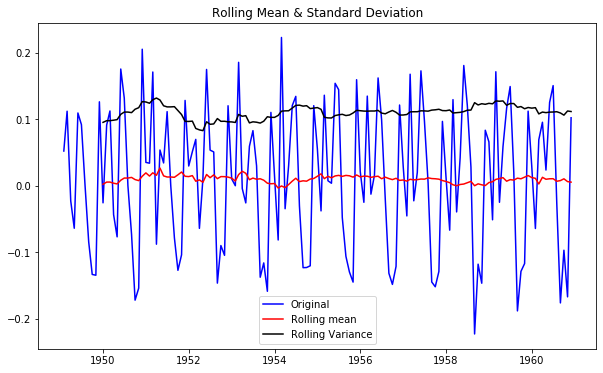

In [32]:
datasetlogDiffShifting=indexedDataset_logScale-indexedDataset_logScale.shift()
datasetlogDiffShifting.dropna(inplace=True)
test_stationarity(datasetlogDiffShifting)

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

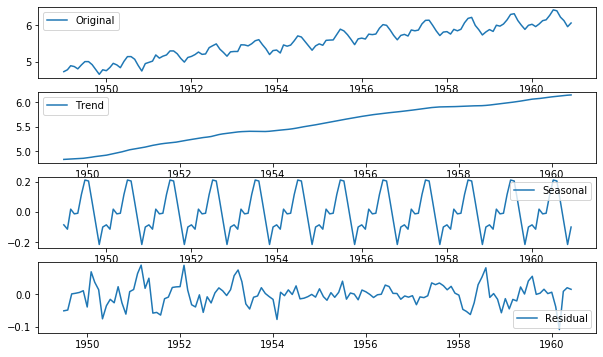

In [38]:
decomposition=seasonal_decompose(indexedDataset_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')


Dickey-Fuller test result
Test Stastistics          -6.332387e+00
p-value                    2.885059e-08
#Lags Used                 9.000000e+00
No of observations used    1.220000e+02
Critical Value (1%)       -3.485122e+00
Critical Value (5%)       -2.885538e+00
Critical Value (10%)      -2.579569e+00
dtype: float64


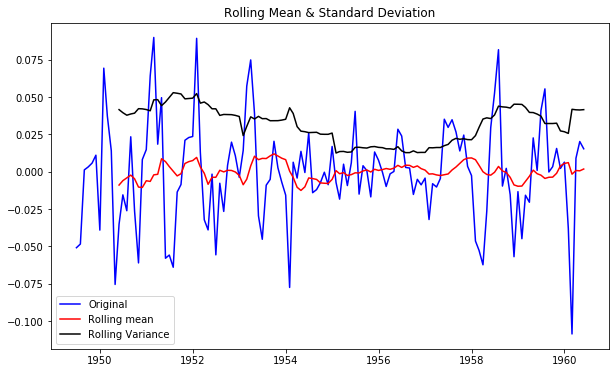

In [39]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

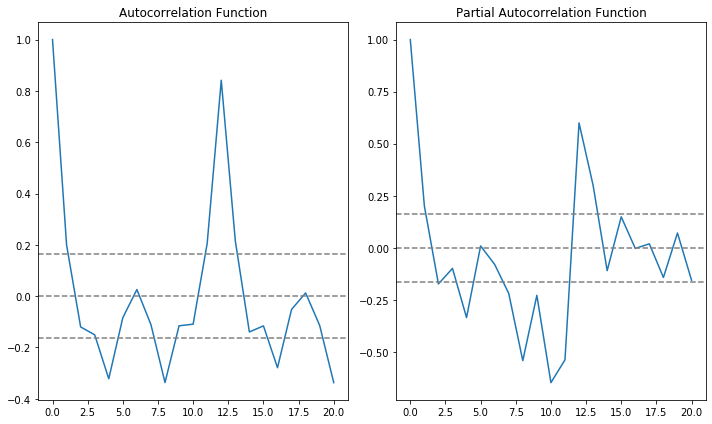

In [40]:
  #ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetlogDiffShifting, nlags=20)
lag_pacf = pacf(datasetlogDiffShifting, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

In [41]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\SMP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\SMP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


NameError: name 'Airpassengers' is not defined

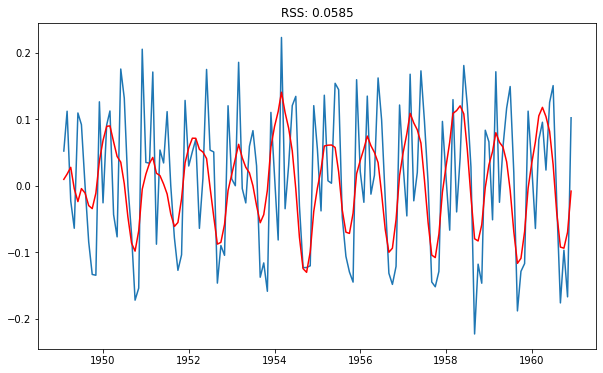

In [49]:
#ARIMA Model
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetlogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum(results_ARIMA.fittedvalues-datasetlogDiffShifting['#Passengers'])**2)
print('Plotting ARIMA model')
Airpassengers.index=pd.DatetimeIndex(Airpassengers.index.values,freq=Airpassengers.index.inferred_freq)
fit1 = sm.tsa.statespace.SARIMAX(...)

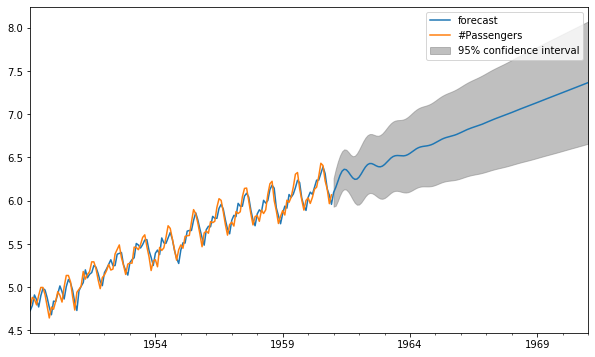

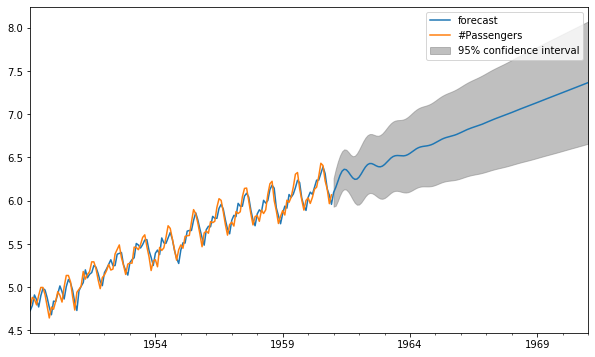

In [47]:
results_ARIMA.plot_predict(1, 264)
#ds = results_ARIMA.forecast(steps=60)

In [46]:
ds

(array([6.09553391, 6.15281403, 6.2244297 , 6.29241111, 6.3416473 ,
        6.36359377, 6.35784699, 6.33139313, 6.29597544, 6.26447712,
        6.2473832 , 6.25025165, 6.27275832, 6.30940312, 6.35151498,
        6.38988664, 6.41727392, 6.43011064, 6.42906696, 6.4184249 ,
        6.40456151, 6.39403607, 6.39183072, 6.40019494, 6.41833686,
        6.44295406, 6.46937438, 6.49293991, 6.51024124, 6.51989037,
        6.52267578, 6.52112382, 6.51864518, 6.51853678, 6.5231191 ,
        6.5332235 , 6.54812862, 6.56591553, 6.58410307, 6.60036539,
        6.61313265, 6.62192778, 6.62737782, 6.63093119, 6.63438676,
        6.63937971, 6.64696491, 6.65739828, 6.67015315, 6.68414243,
        6.6980662 , 6.71077894, 6.72157725, 6.73033974, 6.73749799,
        6.74386365, 6.75037307, 6.75782576, 6.76668666, 6.77699808]),
 array([0.08384711, 0.10749463, 0.11568696, 0.11702777, 0.11703498,
        0.11744019, 0.11762251, 0.11778715, 0.12024164, 0.12736044,
        0.13870962, 0.15118796, 0.16157817, 0.